Exploratory Data Analysis (EDA) on Superstore Sales Dataset


In [40]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better visuals
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [5]:
df = pd.read_csv("../data/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## 1. Data Understanding

In [6]:
df.shape

(9994, 13)

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## 2. Data Cleaning & Feature Engineering

In this step, data quality was improved by verifying duplicate records, correcting data types, and creating new features such as profit margin and discount level to enable deeper business analysis.

In [11]:
df.duplicated().sum()

np.int64(17)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df['Postal Code'] = df['Postal Code'].astype(str)

In [14]:
# Profit Margin (%)
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

# Discount Category
df['Discount_Level'] = df['Discount'].apply(
    lambda x: 'High' if x >= 0.3 else 'Low'
    )

## 3. Sales Analysis

This section analyzes overall sales performance, category-wise distribution, and regional contribution to understand business trends.

### 3.1 Total revenue generated by the superstore.

In [15]:
total_sales = df['Sales'].sum()
total_sales

np.float64(2296195.5903)

###3.2: Sales by Category

In [16]:
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_by_category

Category
Technology         836154.0330
Furniture          741306.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64

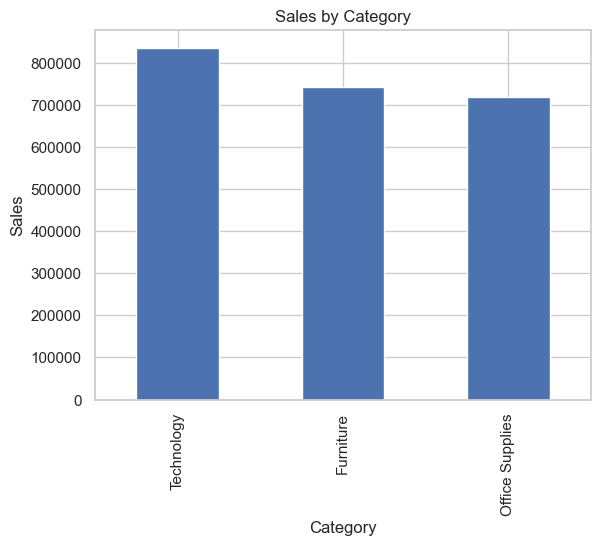

In [17]:
sales_by_category.plot(kind='bar', title='Sales by Category', ylabel='Sales', xlabel='Category')
plt.show()

### 3.3: Sales by Sub-Category (Top 10)

In [18]:
sales_by_subcat = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
sales_by_subcat

Sub-Category
Phones         330007.0540
Chairs         327777.7610
Storage        223843.6080
Tables         206965.5320
Binders        203409.1690
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64

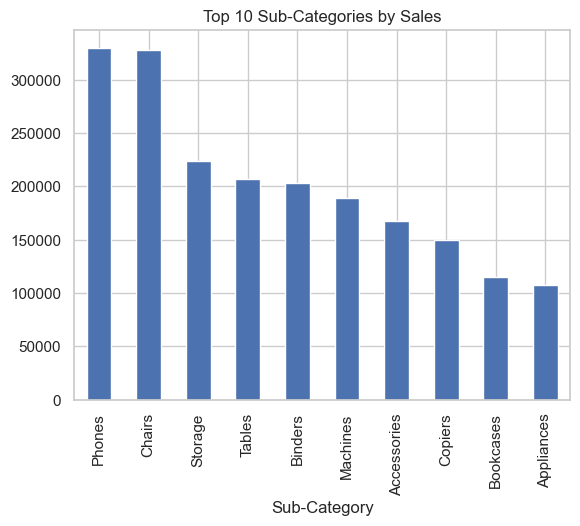

In [19]:
sales_by_subcat.plot(kind='bar', title='Top 10 Sub-Categories by Sales')
plt.show()

### 3.4: Sales by Region

In [20]:
sales_by_region = df.groupby('Region')['Sales'].sum()
sales_by_region

Region
Central    500782.8528
East       678435.1960
South      391721.9050
West       725255.6365
Name: Sales, dtype: float64

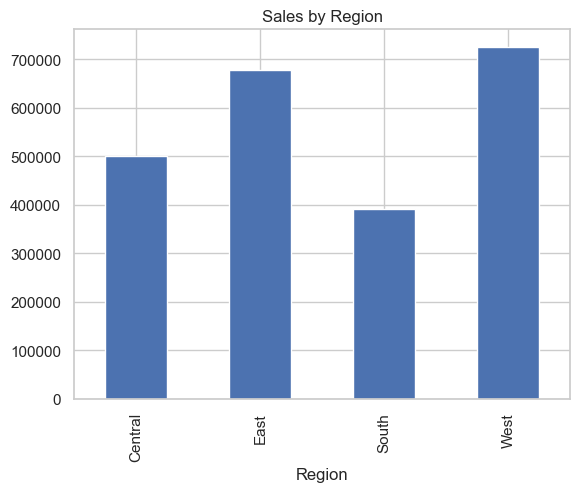

In [21]:
sales_by_region.plot(kind='bar', title='Sales by Region')
plt.show()

### Sales Insights
- Technology category contributes the highest sales.
- Phones and Chairs are among the top-selling sub-categories.
- The West and East regions generate the highest sales.

## 4. Profit Analysis

This section analyzes profit distribution across categories, sub-categories, and regions to identify loss-making areas and opportunities for improvement.

In [22]:
total_profit = df['Profit'].sum()
total_profit

np.float64(286241.42260000005)

In [23]:
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
profit_by_category

Category
Technology         145454.9481
Office Supplies    122364.6608
Furniture           18421.8137
Name: Profit, dtype: float64

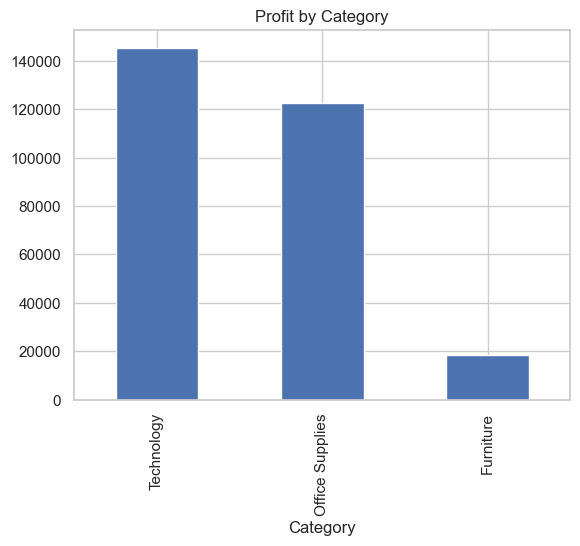

In [24]:
profit_by_category.plot(kind='bar', title='Profit by Category')
plt.show()

In [25]:
profit_by_subcat = df.groupby('Sub-Category')['Profit'].sum().sort_values()
profit_by_subcat

Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5526.3820
Art             6524.6118
Envelopes       6964.1767
Furnishings    13052.7230
Appliances     18138.0054
Storage        21278.8264
Chairs         26567.1278
Binders        30228.0003
Paper          33944.2395
Accessories    41936.6357
Phones         44515.7306
Copiers        55617.8249
Name: Profit, dtype: float64

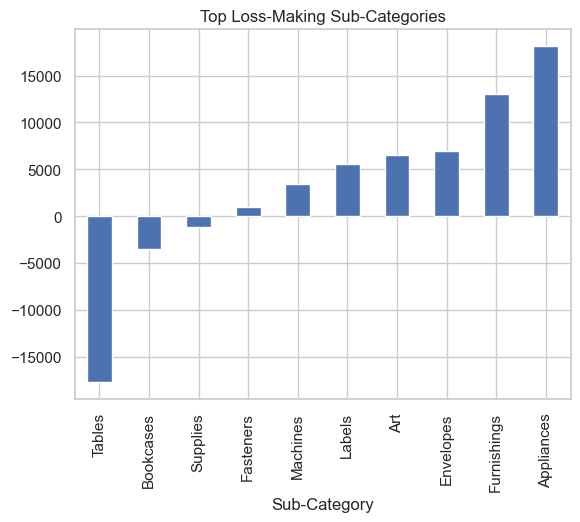

In [26]:
profit_by_subcat.head(10).plot(kind='bar', title='Top Loss-Making Sub-Categories')
plt.show()

In [27]:
profit_by_region = df.groupby('Region')['Profit'].sum()
profit_by_region

Region
Central     39655.8752
East        91506.3092
South       46749.4303
West       108329.8079
Name: Profit, dtype: float64

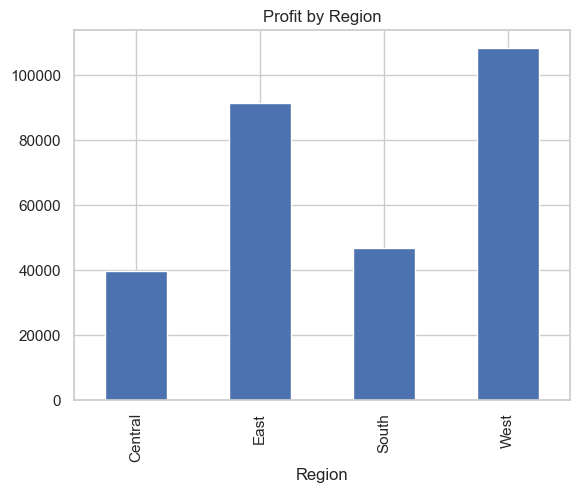

In [28]:
profit_by_region.plot(kind='bar', title='Profit by Region')
plt.show()

## 5. Discount vs Profit Analysis

This section analyzes the relationship between discount levels and profit to understand how discounting impacts business profitability.

In [29]:
df[['Discount', 'Profit']].describe()

,Discount,Profit
count,9977.000000,9977.00000
mean,0.156278,28.69013
std,0.206455,234.45784
min,0.000000,-6599.97800
25%,0.000000,1.72620
50%,0.200000,8.67100
75%,0.200000,29.37200
max,0.800000,8399.97600


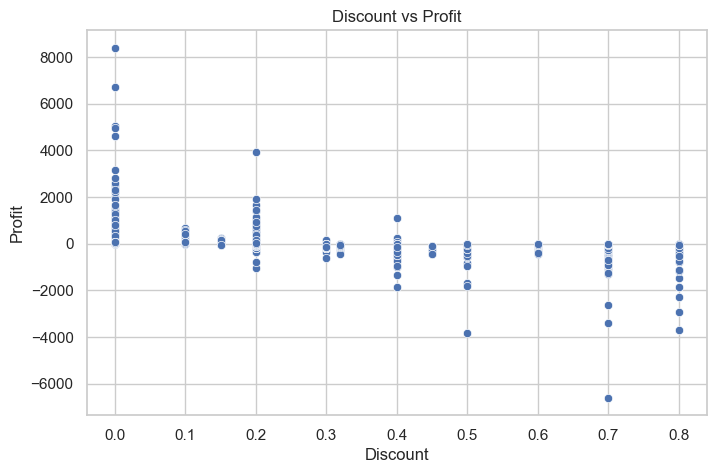

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

In [31]:
discount_profit = df.groupby('Discount')['Profit'].mean()
discount_profit

Discount
0.00     67.024108
0.10     96.055074
0.15     27.288298
0.20     24.721217
0.30    -45.828401
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
0.70    -95.874060
0.80   -102.116395
Name: Profit, dtype: float64

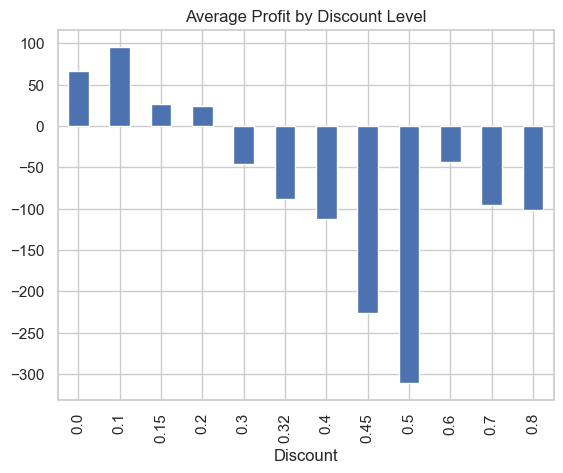

In [32]:
discount_profit.plot(kind='bar', title='Average Profit by Discount Level')
plt.show()

### Discount Insights
- Higher discounts are strongly associated with lower or negative profit.
- Orders with heavy discounts often result in losses.
- Discounting strategy should be carefully optimized to avoid reducing profitability.

## 6. Customer Segment Analysis

This section analyzes sales and profit performance across different customer segments to identify the most valuable customer groups.

In [33]:
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
sales_by_segment

Segment
Consumer       1.160833e+06
Corporate      7.060701e+05
Home Office    4.292927e+05
Name: Sales, dtype: float64

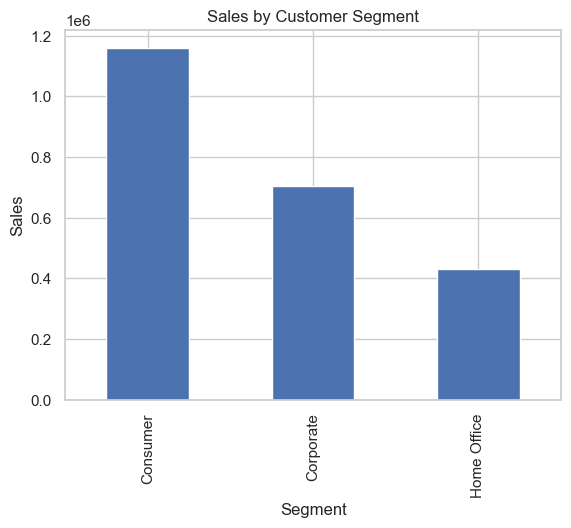

In [34]:
sales_by_segment.plot(kind='bar', title='Sales by Customer Segment')
plt.ylabel('Sales')
plt.show()

In [35]:
profit_by_segment = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
profit_by_segment

Segment
Consumer       134007.4413
Corporate       91954.9798
Home Office     60279.0015
Name: Profit, dtype: float64

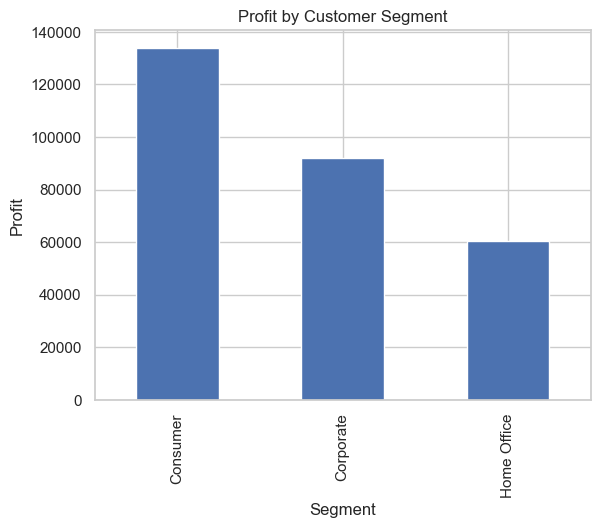

In [36]:
profit_by_segment.plot(kind='bar', title='Profit by Customer Segment')
plt.ylabel('Profit')
plt.show()

### Customer Segment Insights
- Consumer segment generates the highest sales.
- Corporate segment provides stable and consistent profit.
- Home Office segment contributes the least to overall profit.

## 7. Correlation Analysis

This section examines the relationship between numerical variables to identify patterns and dependencies affecting sales and profitability.

In [37]:
corr_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
corr_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


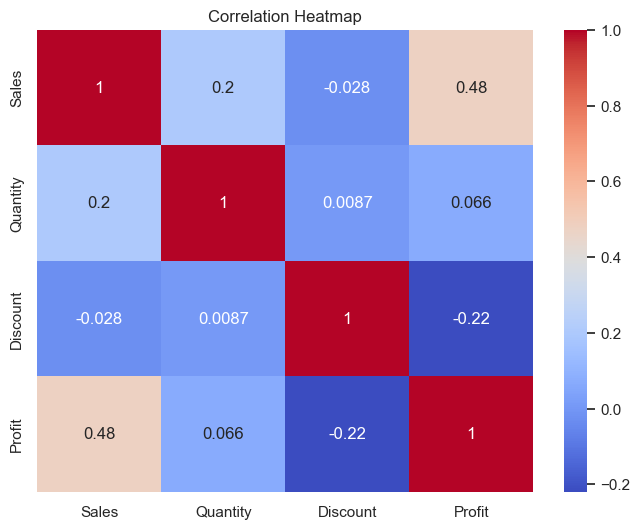

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Correlation Insights
- Sales and Profit show a positive correlation.
- Discount has a negative correlation with Profit.
- Quantity has a weak correlation with Profit.
- High discounts negatively impact overall profitability.

## 8. Final Business Insights & Conclusion

This section summarizes the key findings from the exploratory data analysis and provides business-level insights that can support data-driven decision-making.

### Key Business Insights

- Technology is the most profitable category, while Furniture contributes significant losses.
- High discounts are strongly associated with reduced or negative profit.
- Consumer segment generates the highest sales, but Corporate customers provide more stable profitability.
- The West and East regions perform well in terms of sales and profit.
- Some sub-categories show consistent losses despite good sales volume, indicating pricing or cost issues.

### Business Recommendations

- Optimize discount strategies to avoid excessive discounting on low-margin products.
- Re-evaluate pricing and cost structure for loss-making sub-categories.
- Focus marketing efforts on high-profit categories like Technology.
- Strengthen relationships with profitable customer segments such as Corporate clients.

### Conclusion

This exploratory data analysis provided a comprehensive understanding of sales performance, profitability drivers, and customer behavior for the superstore. By identifying loss-making areas and the impact of discounting, the analysis highlights actionable opportunities to improve business profitability and strategic decision-making.